Proyecto Final
Giselle Noemi Gonzalez
Data Science I

Se va a estudiar la relacion entre las horas de asistencia y de estudio, y las notas finales , que pueden predecir a futuro las notas de estudiantes de acuerdo a su dedicacion en horas de estudio .


CONTENIDO

- Importacion de Datos.
- Limpieza y pre-procesamiento de datos.
- Exploracion del analisis de datos.
- Modelo predictivo
- Resumen

In [3]:
# Importacion de Datos
# Se importan las bibliotecas necesarias
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib
matplotlib.use('Agg')  # Using non-interactive backend
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Se establece la estetica de la figura
sns.set(style="whitegrid")

Importacion de Datos
Se va a cargar un dataset que contiene 2 columnas : Attendance_Hours ( horas de Asistencia ) y Final_Marks ( notas finales obtenidas )


In [4]:
# Carga del dataset
data_path = 'https://raw.githubusercontent.com/Gin59S/proyecto-final/main/Study_vs_Score_data.csv'



try:
    df = pd.read_csv(data_path, encoding='utf-8', delimiter=',')

    # Se muestran las primeras 5 filas
    print(df.head())

except FileNotFoundError:
    print(f"Error: The file was not found at {data_path}.")
    print("Please upload the 'Study_vs_Score_data.csv' file to your Colab environment or update the 'data_path' variable with the correct file path.")

   Attendance_Hours  Final_Marks
0         36.217808    58.997409
1         76.550001    71.598279
2         61.239576    72.520777
3         51.906094    69.005976
4         20.921305    53.259605


Limpieza de datos y pre-procesamiento
Se inspecciona el dataset en busca de valores perdidos o anomalias en los mismos.

In [5]:
# Check the dataframe info and missing values
print(df.info())

# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Attendance_Hours  1000 non-null   float64
 1   Final_Marks       1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB
None
Missing values in each column:
 Attendance_Hours    0
Final_Marks         0
dtype: int64


**Análisis exploratorio de datos**
Exploramos los datos mediante diversos gráficos.
Debido a que solo se cuenta con 2 columnas numericas, se crean histogramas,
un grafico de pares, un grafico de dispersion con una linea de regresion y un boxplot ( diagrama de caja ) para poder comprender la distribucion y la relacion
de las variables.


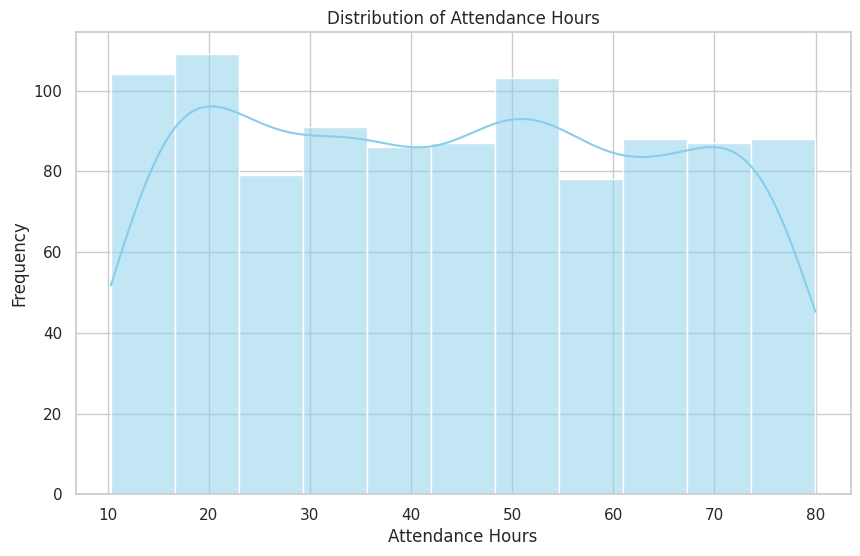

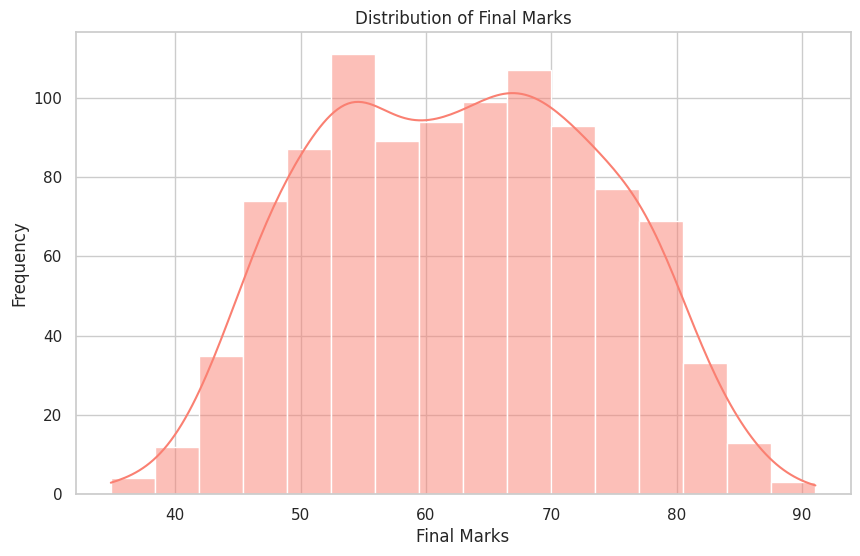

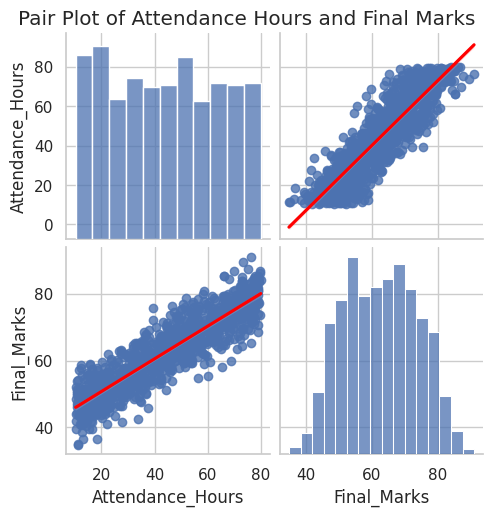

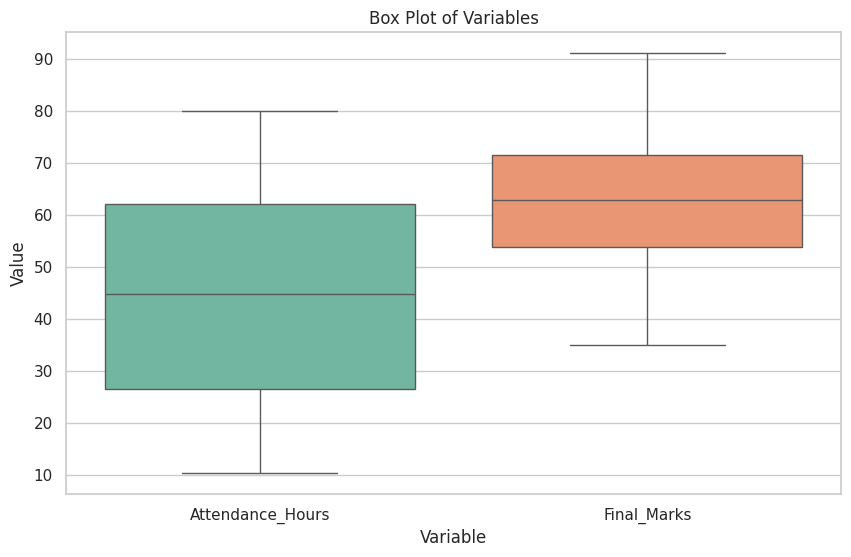

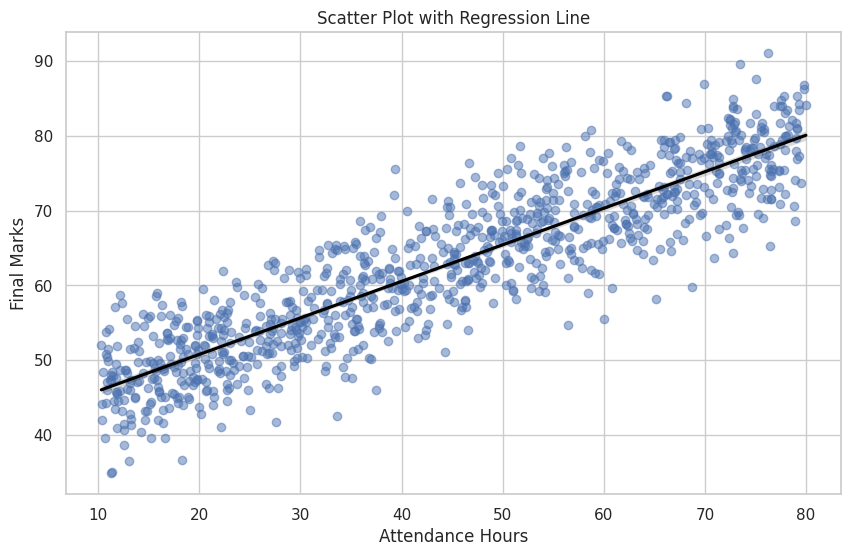

In [6]:
#  Aqui configuro el tamaño de todos los graficos
plt.rcParams['figure.figsize'] = (10, 6)

# Histograma de horas de asistencia
sns.histplot(df['Attendance_Hours'], kde=True, color='skyblue')
plt.title('Distribution of Attendance Hours')
plt.xlabel('Attendance Hours')
plt.ylabel('Frequency')
plt.show()

# Histograma de Calificaciones finales
sns.histplot(df['Final_Marks'], kde=True, color='salmon')
plt.title('Distribution of Final Marks')
plt.xlabel('Final Marks')
plt.ylabel('Frequency')
plt.show()

#Diagrama de pares para explorar la relación entre las dos variables
sns.pairplot(df, kind='reg', plot_kws={'line_kws':{'color':'red'}})
plt.suptitle('Pair Plot of Attendance Hours and Final Marks', y=1.02)
plt.show()

# Este histograma me  permite ver cómo se distribuyen las horas de asistencia: si hay valores atípicos,
# si la mayoría de los estudiantes tienen muchas o pocas horas.


# Diagrama de caja para ambas variables una al lado de la otra
df_melt = df.melt()
sns.boxplot(x='variable', y='value', data=df_melt, palette='Set2')
plt.title('Box Plot of Variables')
plt.xlabel('Variable')
plt.ylabel('Value')
plt.show()

# Diagrama de dispersión con línea de regresión
sns.regplot(x='Attendance_Hours', y='Final_Marks', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'black'})
plt.title('Scatter Plot with Regression Line')
plt.xlabel('Attendance Hours')
plt.ylabel('Final Marks')
plt.show()

**Modelado Predictivo**
Ahora construimos un modelo predictivo para estimar las calificaciones finales de un estudiante en  base a las horas de asistencia.
 Un modelo de regresión lineal simple es adecuado en este caso debido a la relación lineal observada en nuestros gráficos.
 Se evalua el  el modelo utilizando el R².

R-squared Score: 0.8233456032324955
Coefficient (slope): 0.4874354132565429
Intercept: 41.07493233117574


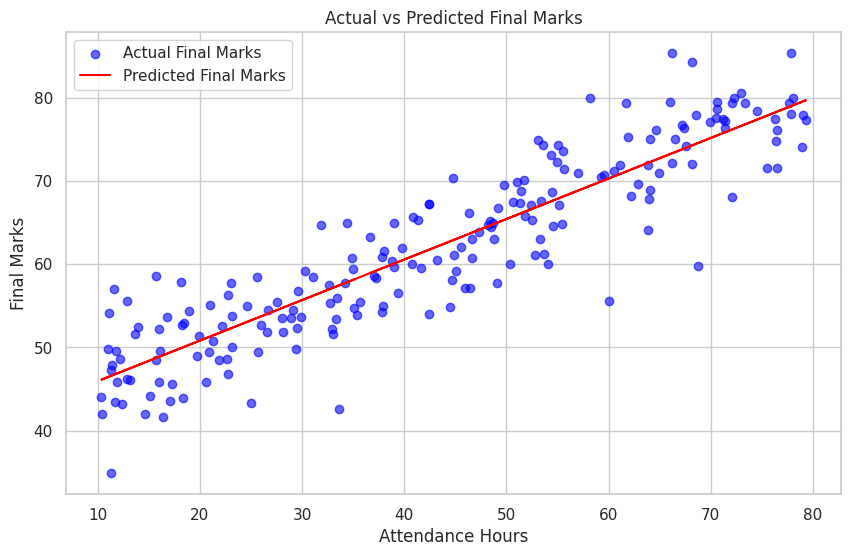

In [ ]:
# Se definen  variables de características y de destino
X = df[['Attendance_Hours']].values  # Predictor
y = df['Final_Marks'].values           # Variable de respuesta


# Se dividen los  datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Se inicializa y entrena  el modelo de regresión lineal


model = LinearRegression()
model.fit(X_train, y_train)

# Se hacen predicciones sobre el conjunto de pruebas.
y_pred = model.predict(X_test)

# Aqui se mide  el rendimiento de la predicción utilizando la puntuación R-cuadrado
accuracy = r2_score(y_test, y_pred)
print('R-squared Score:', accuracy)

# Aqui se muestran  los coeficientes del modelo y la intersección
print('Coefficient (slope):', model.coef_[0])
print('Intercept:', model.intercept_)

# Aqui se grafican las predicciones vs las calificaciones finales reales
plt.scatter(X_test, y_test, color='blue', label='Actual Final Marks', alpha=0.6)
plt.plot(X_test, y_pred, color='red', label='Predicted Final Marks')
plt.title('Actual vs Predicted Final Marks')
plt.xlabel('Attendance Hours')
plt.ylabel('Final Marks')
plt.legend()
plt.show()

***Resumen del Presente Analisis***

En este cuaderno, se hizo hincapie en un análisis sencillo pero informativo sobre la relación entre las horas de estudio (aproximadas por las horas de asistencia) y las calificaciones finales. Utilizamos diversas técnicas de visualización, como histogramas, diagramas de caja, un diagrama de pares y un diagrama de dispersión con una línea de regresión, para comprender la distribución y las relaciones de los datos.

**Posteriormente, se implementó un modelo de regresión lineal, que alcanzó cierto nivel de precisión, medido mediante el valor R². Este modelo podría servir como predictor de referencia para futuras investigaciones**.

El dataset utilizado contiene solo dos columnas: Attendance_Hours (horas de asistencia) y Final_Marks (notas finales). En este contexto, Attendance_Hours es la única característica (variable independiente) que se usa para predecir Final_Marks.
 Dado que solo hay una característica predictora, no hay "dimensionalidad que reducir" al seleccionar un subconjunto de características. El notebook implícitamente selecciona la única característica disponible. Para un futuro analisis de este tipo de datasets o similares  , se podría aplicar un metodo mas complejo de seleccion de caracteristicas ( en el caso de tener mas variables que analizar )


Las ventajas de nuestro enfoque incluyen diversas técnicas de visualización que dotan al análisis de robustez y transparencia. El trabajo futuro podría incorporar funciones adicionales, aplicar técnicas de regresión polinómica o regularización, y explorar datos temporales, si están disponibles.

